# Notebook 1.

In [7]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

from scipy.io import arff

# Cargar el archivo .arff
data, meta = arff.loadarff(r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\inria\phpMawTba.arff")

# Convertir a DataFrame de pandas
adult_census = pd.DataFrame(data)
adult_census.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.00,b'Private',226802.00,b'11th',7.00,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.00,0.00,40.00,b'United-States',b'<=50K'


In [8]:
target_name = "class"
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

target = adult_census[target_name]
target = target.str.decode('utf-8')  # Decodificar bytes a string
data = adult_census[numerical_columns]

data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25.00,0.00,0.00,40.00
1,38.00,0.00,0.00,50.00
2,28.00,0.00,0.00,40.00
3,44.00,7688.00,0.00,40.00
4,18.00,0.00,0.00,30.00


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline(
    steps=[
        ("preprocessor", StandardScaler()),
        ("classifier", LogisticRegression())
    ]
)

In [13]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', StandardScaler()),
  ('classifier', LogisticRegression())],
 'verbose': False,
 'preprocessor': StandardScaler(),
 'classifier': LogisticRegression(),
 'preprocessor__copy': True,
 'preprocessor__with_mean': True,
 'preprocessor__with_std': True,
 'classifier__C': 1.0,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'deprecated',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [11]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target)
scores = cv_results['test_score']

print(
    "Acurracy socre via cross-validation: \n"
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

Acurracy socre via cross-validation: 
0.800 ± 0.003


We can also change the hyperparameter of a model after it has been created
with the `set_params` method, which is available for all scikit-learn
estimators. For example, we can set `C=1e-3`, fit and evaluate the model:

In [14]:
model.set_params(classifier__C=1e-3)
cv_results = cross_validate(model, data, target)
scores = cv_results['test_score']

print(
    "Acurracy socre via cross-validation: \n"
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

Acurracy socre via cross-validation: 
0.787 ± 0.002


When the model of interest is a `Pipeline`, the hyperparameter names are of
the form `<model_name>__<hyperparameter_name>` (note the double underscore in
the middle). In our case, `classifier` comes from the `Pipeline` definition
and `C` is the hyperparameter name of `LogisticRegression`.

In general, you can use the `get_params` method on scikit-learn models to list
all the hyperparameters with their values. For example, if you want to get all
the hyperparameter names, you can use:

In [15]:
for parameter in model.get_params():
    print(parameter)

memory
steps
verbose
preprocessor
classifier
preprocessor__copy
preprocessor__with_mean
preprocessor__with_std
classifier__C
classifier__class_weight
classifier__dual
classifier__fit_intercept
classifier__intercept_scaling
classifier__l1_ratio
classifier__max_iter
classifier__multi_class
classifier__n_jobs
classifier__penalty
classifier__random_state
classifier__solver
classifier__tol
classifier__verbose
classifier__warm_start


`.get_params()` returns a `dict` whose keys are the hyperparameter names and
whose values are the hyperparameter values. If you want to get the value of a
single hyperparameter, for example `classifier__C`, you can use:

In [16]:
model.get_params()["classifier__C"]

0.001

In [17]:
for C in [1e-3, 1e-2, 1e-1, 1, 10]:
    model.set_params(classifier__C=C)
    cv_results = cross_validate(model, data, target)
    scores = cv_results['test_score']
    print(
        f"Accuracy score via cross-validation with C={C}:\n"
        f"{scores.mean():.3f} ± {scores.std():.3f}"
    )

Accuracy score via cross-validation with C=0.001:
0.787 ± 0.002
Accuracy score via cross-validation with C=0.01:
0.799 ± 0.003
Accuracy score via cross-validation with C=0.1:
0.800 ± 0.003
Accuracy score via cross-validation with C=1:
0.800 ± 0.003
Accuracy score via cross-validation with C=10:
0.800 ± 0.003


# Notebook 2.

In [97]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

from scipy.io import arff

# Cargar el archivo .arff
data, meta = arff.loadarff(r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\inria\phpMawTba.arff")

# Convertir a DataFrame de pandas
adult_census = pd.DataFrame(data)

target_name = "class"
target = adult_census[target_name]
target = target.str.decode('utf-8')

data = adult_census.drop(columns=[target_name, "education-num"])

In [98]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [99]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

Here we use a tree-based model as a classifier (i.e.
`HistGradientBoostingClassifier`). That means:

* Numerical variables don't need scaling;
* Categorical variables can be dealt with an `OrdinalEncoder` even if the
  coding order is not meaningful;
* For tree-based models, the `OrdinalEncoder` avoids having high-dimensional
  representations.

We now build our `OrdinalEncoder` by passing it the known categories.

In [100]:
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

In [101]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("cat_preprocessor", categorical_preprocessor, categorical_columns),
    ],
    remainder="passthrough",
)

In [102]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline


model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", 
         HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4)),
    ]
)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__learning_rate": (0.01, 0.1, 1, 10),
    "classifier__max_leaf_nodes": (3, 10, 30),
}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=2)
model_grid_search.fit(data_train, target_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_preprocessor',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                                       random_state=42))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': (0.01, 0.1, 1, 10),
                         'classifier__max_leaf_nodes': (3, 10, 30)})

In [104]:
accuracy = model_grid_search.score(data_test, target_test)
print(
    f"The test accuracy score of the grid-searched pipeline is: {accuracy:.2f}"
)


The test accuracy score of the grid-searched pipeline is: 0.88


In [105]:
model_grid_search.predict(data_test.iloc[0:5])

array(['<=50K', '<=50K', '>50K', '<=50K', '>50K'], dtype=object)

In [106]:
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The best set of parameters is: {'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}


In [107]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
5,0.61,0.03,0.16,0.00,0.10,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.87,0.87,0.87,0.00,1
4,0.48,0.00,0.15,0.00,0.10,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.87,0.87,0.87,0.00,2
6,0.22,0.00,0.11,0.00,1.00,3,"{'classifier__learning_rate': 1, 'classifier__...",0.86,0.86,0.86,0.00,3
7,0.17,0.00,0.11,0.00,1.00,10,"{'classifier__learning_rate': 1, 'classifier__...",0.86,0.86,0.86,0.00,4
3,0.36,0.00,0.13,0.00,0.10,3,"{'classifier__learning_rate': 0.1, 'classifier...",0.85,0.85,0.85,0.00,5


In [108]:
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,learning_rate,max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
5,0.10,30,0.87,0.00,1
4,0.10,10,0.87,0.00,2
6,1.00,3,0.86,0.00,3
7,1.00,10,0.86,0.00,4
3,0.10,3,0.85,0.00,5
8,1.00,30,0.85,0.00,6
2,0.01,30,0.85,0.00,7
1,0.01,10,0.82,0.00,8
0,0.01,3,0.80,0.00,9
10,10.00,10,0.62,0.12,10


In [109]:
pivoted_cv_results = cv_results.pivot(
    values="mean_test_score",
    index=['learning_rate'],
    columns=['max_leaf_nodes']
)
pivoted_cv_results

max_leaf_nodes,3,10,30
learning_rate,,,
0.01,0.80,0.82,0.85
0.10,0.85,0.87,0.87
1.00,0.86,0.86,0.85
10.00,0.28,0.62,0.35


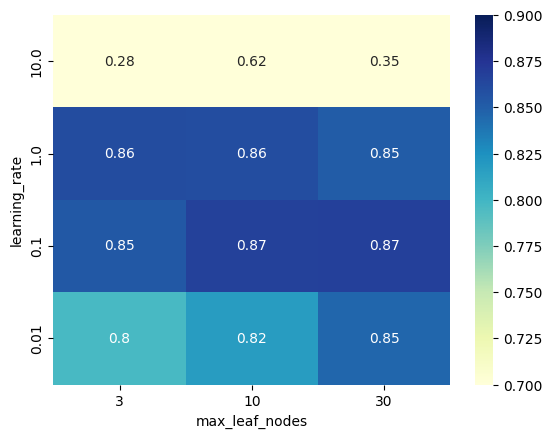

In [110]:
import seaborn as sns

ax = sns.heatmap(
    pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.9
)
ax.invert_yaxis()

# Notebook 3.

In [111]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

from scipy.io import arff

# Cargar el archivo .arff
data, meta = arff.loadarff(r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\inria\phpMawTba.arff")

# Convertir a DataFrame de pandas
adult_census = pd.DataFrame(data)

target_name = "class"
target = adult_census[target_name]
target = target.str.decode('utf-8')

data = adult_census.drop(columns=[target_name, "education-num"])

In [112]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    [("cat_preprocessor", categorical_preprocessor, categorical_columns)],
    remainder="passthrough",
)

In [114]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4),
        ),
    ]
)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

We now optimize 3 other parameters in addition to the ones we optimized in
the notebook presenting the `GridSearchCV`:

* `l2_regularization`: it corresponds to the strength of the regularization;
* `min_samples_leaf`: it corresponds to the minimum number of samples required
  in a leaf;
* `max_bins`: it corresponds to the maximum number of bins to construct the
  histograms.

We recall the meaning of the 2 remaining parameters:

* `learning_rate`: it corresponds to the speed at which the gradient-boosting
  corrects the residuals at each boosting iteration;
* `max_leaf_nodes`: it corresponds to the maximum number of leaves for each
  tree in the ensemble.

In [115]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [116]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "classifier__l2_regularization": loguniform(1e-6, 1e3),
    "classifier__learning_rate": loguniform(0.001, 10),
    "classifier__max_leaf_nodes": loguniform_int(2, 256),
    "classifier__min_samples_leaf": loguniform_int(1, 100),
    "classifier__max_bins": loguniform_int(2, 255),
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
)
model_random_search.fit(data_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
                                                                                'race',
                                                                                'sex',
                                                                                'native-country'])])),
                                             ('classifier',
                                              HistGradientBoostingC...
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002BC0B338050>,
                                        'classifier__max_bins': <__main__.loguniform_int object at 0x000002BC049C4E00>,
                                        'classifier__max_leaf_nodes': <__main__.loguniform_int object at 0x000002BC049C6060>,
                                        'classifier__min_samples_leaf': <__main__.loguniform_int object at 0x000002BC049C4E90>},
                   verbose=1)

In [117]:
accuracy = model_random_search.score(data_test, target_test)

print(f"The test accuracy score of the best model is {accuracy:.2f}")

The test accuracy score of the best model is 0.88


In [118]:
from pprint import pprint

print("The best parameters are:")
pprint(model_random_search.best_params_)

The best parameters are:
{'classifier__l2_regularization': 0.0006650201942949796,
 'classifier__learning_rate': 0.31731511170356325,
 'classifier__max_bins': 146,
 'classifier__max_leaf_nodes': 20,
 'classifier__min_samples_leaf': 14}


In [119]:
# get the parameter names
column_results = [f"param_{name}" for name in param_distributions.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False
)


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,l2_regularization,learning_rate,max_leaf_nodes,min_samples_leaf,max_bins,mean_test_score,std_test_score,rank_test_score
4,0.00,0.32,20,14,146,0.87,0.00,1
1,0.00,0.08,49,50,229,0.87,0.00,2
9,0.00,0.05,12,12,18,0.85,0.00,3
7,0.07,0.01,10,89,46,0.83,0.00,4
8,0.01,0.01,223,80,45,0.82,0.00,5
0,0.00,0.00,11,2,10,0.76,0.00,6
2,3.07,0.00,5,6,93,0.76,0.00,6
3,0.00,0.00,26,96,3,0.76,0.00,6
5,0.00,2.20,190,4,10,0.76,0.03,9
6,0.38,3.94,2,29,5,0.28,0.01,10
